In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# # # # # # #                                         # # # # # # #
# # # # # # #             Dimple Surface              # # # # # # # 
# # # # # # #                                         # # # # # # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [2]:
from veech import *

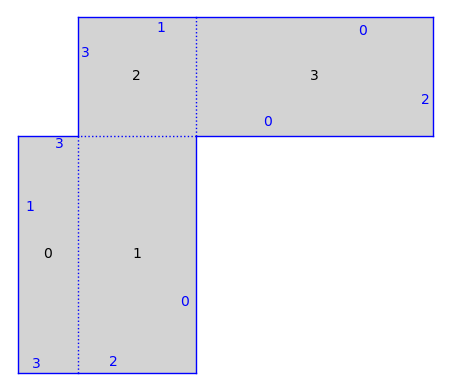

In [75]:
def dimple(x,y):

    def rectangle(a,b):
        return polygons(vertices = [(0,0),(a,0),(a,b),(0,b)])

    P1 = rectangle(x,y)
    Q1 = rectangle(1,y)
    R1 = rectangle(1,1)
    S1 = rectangle(y,1)
    
    s = Surface_list(QQ)

    s.add_polygon(P1)
    s.add_polygon(Q1)
    s.add_polygon(R1)
    s.add_polygon(S1)

    S = SimilaritySurface(s)

    s.set_edge_pairing(0,0,3,2)
    s.set_edge_pairing(0,1,1,3)
    s.set_edge_pairing(0,2,3,0)
    s.set_edge_pairing(0,3,1,1)
    s.set_edge_pairing(1,0,2,2)
    s.set_edge_pairing(1,2,2,0)
    s.set_edge_pairing(2,1,3,3)
    s.set_edge_pairing(2,3,3,1)

    gs = S.graphical_surface()

    gs.make_adjacent(1,2)
    gs.make_adjacent(2,1)      
    
    DS = S.minimal_cover(cover_type='dilation').copy(relabel=True)
    
    return DS, S, gs, s

DS, S, gs, s = dimple(1/2,2)
gs.plot()

In [317]:
# We first imagined the Dimple surface as a (1 by 1) square torus surface
# with an (x by x) square cut out, and replaced by a (1 by y) rectangle.
# 
# Then, we chose a presentation with the cut-out in the lower-left corner.
# The simplest presentation might be the following reparameterization:
# 
# Normalize Box 2 to be a unit square, and let x and y vary as the height and width of Box 0, respectively.
#
# The horizontal left-right sheers are generated by    [[1,z],    where  z = lcm( (x + 1)/y, y + 1).
#                                                       [0,1]]                   
# 
# The vertical up-down sheers are generated by         [[1, 0],   where z' = lcm(1/(y+1), xy/(y^2 + x)).
#                                                       [z',1]]
#                                                               
# This is because the surface decomposes into horizontal cylinders of moduli (x + 1)/y and y + 1,
# and it decomposes into vertical cylinders of moduli 1/(y+1) and xy/(y^2 + x).
# 
# These formulas match the results found,
# namely, the entries 6, 4, and 10 matrices for dimple(2,1), dimple(3,1), dimple(2,1).
# 
# Using FlatSurf, we are searching for Veech elements under certain simple parameters.
# Under the number of iterations we've tried so far, Flatsurf doesn't terminate,
# it just keeps finding more and more veech elements.

In [318]:
# DS, S, gs, s = dimple(2,1)
# IDC1 = IDC(DS, 200, veech = 1, show_current_sym = 0)
# show(IDC1.plot(model = 'UHP', figsize = 5)) #UHP or KM
# gs.plot()
# veech_matrices = list(IDC1.generators(normalize_det=1))
# show(veech_matrices)

In [19]:
all_veech_matrices = {}

In [173]:
def display_info(parameters, i = 0):
#     print('plain matrices:')
#     print(all_veech_matrices[parameters][0][0])
    
    print('parameters = ' + parameters)

    print('\nveech_matrices:')
    show(all_veech_matrices[parameters][0])

    print('\neigenvectors:')
    count = 0
    for m in all_veech_matrices[parameters][0]:
        string_to_print = str(count) + ' '*(count<10) + ' : ' + str(m.eigenvectors_right()[0][1][0])
        if int(str(len(m.eigenvectors_right()[0][1]))) > 1:
            string_to_print += ' , ' + str(m.eigenvectors_right()[0][1][1])
        print(string_to_print)
#         print(m.eigenvectors_right()[0][1])
        count += 1

    print('\nsample matrix:')
    print(all_veech_matrices[parameters][0][i])

    print('\nsample eigenvector:')
    eigen = list(all_veech_matrices[parameters][0][i].eigenvectors_right()[0][1][0])
    print(eigen)

    v = all_veech_matrices[parameters][1].tangent_vector(0, (1/51,1/51), eigen)
    traj = v.straight_line_trajectory()
    traj.flow(1000)
#     print('\nclosed: ' + str(traj.is_closed()))
#     print('saddle: ' + str(traj.is_saddle_connection()))
    show(all_veech_matrices[parameters][1].plot() + traj.cylinder().plot(alpha=.4, color = 'red') + traj.plot(color='red', thickness = 2))
    

In [23]:
DS, S, gs, s = dimple(1,1)
IDC1 = IDC(DS, 300, veech = 1, show_current_sym = 0)
all_veech_matrices['1,1'] = [list(IDC1.generators(normalize_det=1)),S]


IDR 4/300 --> 0.62 seconds
Veech terminated


plain matrices:
[ 0 -1]
[ 1  2]
parameters = 1,1

veech_matrices:


[
[ 0 -1]  [ 0  1]  [-1  0]  [-1  0]
[ 1  2], [-1  0], [ 0 -1], [-1 -1]
]


eigenvectors:
0  : (1, -1)
1  : (1, -1*I)
2  : (1, 0) , (0, 1)
3  : (0, 1)

sample matrix:
[-1  0]
[ 0 -1]

sample eigenvector:
[1, 0]


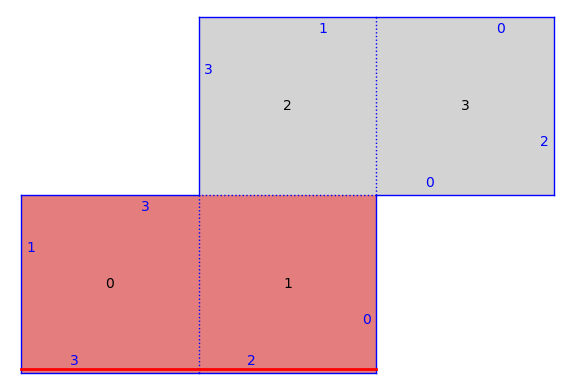

In [168]:
display_info('1,1',2)

/private/var/tmp/sage-9.6-current/local/var/lib/sage/venv-python3.10.3/lib/python3.10/site-packages/sage/rings/qqbar.py:2865: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  roots = p.roots(ring, False)


/private/var/tmp/sage-9.6-current/local/var/lib/sage/venv-python3.10.3/lib/python3.10/site-packages/zmq/sugar/attrsettr.py:51: RuntimeWarning: cypari2 leaked 11809943008 bytes on the PARI stack
  return self._get_attr_opt(upper_key, opt)


ERROR: inconsistent avma when removing Gen from PARI stack
Expected: 0x2bfe56950
Actual:   0x2bfed94c8
IDR 2000/2000 --> 326.94 seconds


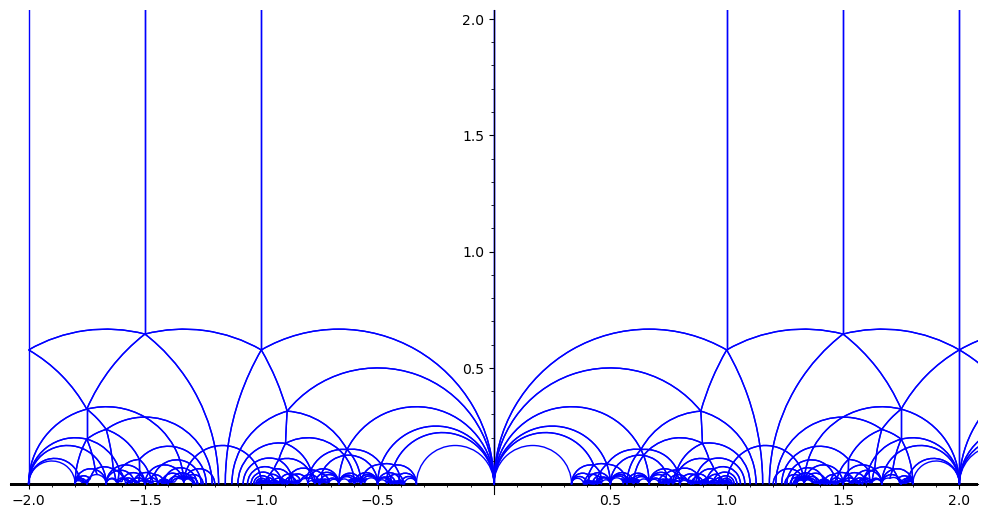

[
[161 144]  [ 119  180]  [ 121  180]  [ 65 -53]  [ 121 -180]
[180 161], [ -80 -121], [ -80 -119], [-38  31], [  80 -119],

[    47    -77]  [ 23/2  63/2]  [ 473/2   -107]  [-15 -32]  [ 21  11]
[-119/2  195/2], [ -7/2 -19/2], [-305/2     69], [  8  17], [-44 -23],

[ 23  11]  [ -797/4 -1157/4]  [ 29  20]  [ 23 -11]  [-23/2 -63/2]
[-44 -21], [ -549/4  -797/4], [-45 -31], [ 44 -21], [  7/2  19/2],

[-19/2 -63/2]  [-14  -5]  [-161  144]  [65 53]  [  797/4 -1157/4]
[  7/2  23/2], [-39 -14], [ 180 -161], [38 31], [ -549/4   797/4],

[   47    77]  [473/2   107]  [-31 -20]  [-1  6]  [ 479/2 -689/2]
[119/2 195/2], [305/2    69], [ 45  29], [ 0 -1], [-333/2  479/2],

[-15 -58]  [1 0]  [-23 -11]  [   -47     77]  [-121  180]  [-31  20]
[ -8 -31], [6 1], [ 44  21], [ 119/2 -195/2], [ -80  119], [-45  29],

[-1  0]
[ 0 -1]
]

In [81]:
DS, S, gs, s = dimple(2,1)
IDC1 = IDC(DS, 2000, veech = 1, show_current_sym = 0)
all_veech_matrices['2,1'] = [list(IDC1.generators(normalize_det=1)),S]
show(IDC1.plot(model = 'UHP', figsize = 10)) #UHP or KM
show(list(IDC1.generators(normalize_det=1)))

parameters = 2,1

veech_matrices:


[
[161 144]  [ 119  180]  [ 121  180]  [ 65 -53]  [ 121 -180]
[180 161], [ -80 -121], [ -80 -119], [-38  31], [  80 -119],

[    47    -77]  [ 23/2  63/2]  [ 473/2   -107]  [-15 -32]  [ 21  11]
[-119/2  195/2], [ -7/2 -19/2], [-305/2     69], [  8  17], [-44 -23],

[ 23  11]  [ -797/4 -1157/4]  [ 29  20]  [ 23 -11]  [-23/2 -63/2]
[-44 -21], [ -549/4  -797/4], [-45 -31], [ 44 -21], [  7/2  19/2],

[-19/2 -63/2]  [-14  -5]  [-161  144]  [65 53]  [  797/4 -1157/4]
[  7/2  23/2], [-39 -14], [ 180 -161], [38 31], [ -549/4   797/4],

[   47    77]  [473/2   107]  [-31 -20]  [-1  6]  [ 479/2 -689/2]
[119/2 195/2], [305/2    69], [ 45  29], [ 0 -1], [-333/2  479/2],

[-15 -58]  [1 0]  [-23 -11]  [   -47     77]  [-121  180]  [-31  20]
[ -8 -31], [6 1], [ 44  21], [ 119/2 -195/2], [ -80  119], [-45  29],

[-1  0]
[ 0 -1]
]


eigenvectors:
0  : (1, -1.118033988749895?)
1  : (1, -2/3)
2  : (1, -2/3)
3  : (1, 1.226218532128440?)
4  : (1, 2/3)
5  : (1, 0.6102997305624648?)
6  : (1, -1/3)
7  : (1, 2.210249781705650?)
8  : (1, -1/2)
9  : (1, -2)
10 : (1, -2)
11 : (1, 0.6888417997369373?)
12 : (1, -3/2)
13 : (1, 2)
14 : (1, -1/3)
15 : (1, -1/3)
16 : (1, 2.792848008753789?)
17 : (1, -1.118033988749895?)
18 : (1, -1.226218532128440?)
19 : (1, 0.6888417997369373?)
20 : (1, -0.6102997305624648?)
21 : (1, -2.210249781705650?)
22 : (1, -3/2)
23 : (1, 0)
24 : (1, 0.6952043898642342?)
25 : (1, 0.5341077687267606?)
26 : (0, 1)
27 : (1, -2)
28 : (1, -1.266143886406621?)
29 : (1, 2/3)
30 : (1, 3/2)
31 : (1, 0) , (0, 1)

sample matrix:
[ 119  180]
[ -80 -121]

sample eigenvector:
[1, -2/3]


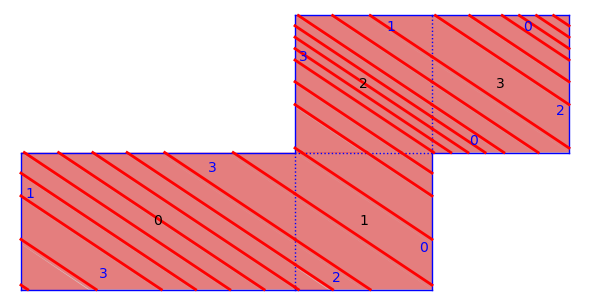

In [209]:
display_info('2,1',1)

In [211]:
DS, S, gs, s = dimple(3,1)
IDC1 = IDC(DS, 2000, veech = 1, show_current_sym = 0)
all_veech_matrices['3,1'] = [list(IDC1.generators(normalize_det=1)),S]

/private/var/tmp/sage-9.6-current/local/var/lib/sage/venv-python3.10.3/lib/python3.10/site-packages/sage/rings/qqbar.py:2865: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  roots = p.roots(ring, False)


IDR 2000/2000 --> 291.87 seconds


parameters = 3,1

veech_matrices:


[
[    95     36]  [  111    84]  [-205  174]  [-1  4]  [   111    -84]
[-388/3    -49], [440/3   111], [  86  -73], [ 0 -1], [-440/3    111],

[ 929/3    238]  [-1  0]  [-1  0]  [139 118]  [ 1  0]  [ 49  96]
[-566/3   -145], [ 4 -1], [-4 -1], [-86 -73], [-4  1], [-24 -47],

[  -49    36]  [ 205 -174]  [  -49   -36]  [-1  0]
[200/3   -49], [ -86   73], [388/3    95], [ 0 -1]
]


eigenvectors:
0  : (1, -2.638284738504226?)
1  : (1, -1.321374945286820?)
2  : (1, -0.4195195565008761?)
3  : (1, 0)
4  : (1, 1.321374945286820?)
5  : (1, -1.301094930958781?)
6  : (0, 1)
7  : (0, 1)
8  : (1, -1.177837669533401?)
9  : (0, 1)
10 : (1, -1/2)
11 : (1, -1.360827634879544?)
12 : (1, 1.178140246156049?)
13 : (1, -1.361715261495775?)
14 : (1, 0) , (0, 1)

sample matrix:
[ 49  96]
[-24 -47]

sample eigenvector:
[1, -1/2]


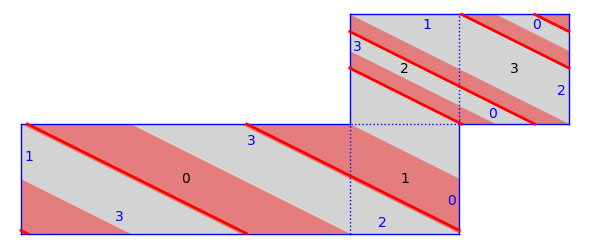

In [215]:
display_info('3,1',10)

In [68]:
DS, S, gs, s = dimple(4,1)
IDC1 = IDC(DS, 300, veech = 1, show_current_sym = 0)
all_veech_matrices['4,1'] = [list(IDC1.generators(normalize_det=1)),S]


IDR 300/300 --> 38.65 seconds


parameters = 4,1

veech_matrices:


[
[  1 -10]  [-1  0]
[  0   1], [ 0 -1]
]


eigenvectors:
0  : (1, 0)
1  : (1, 0) , (0, 1)

sample matrix:
[-1  0]
[ 0 -1]

sample eigenvector:
[1, 0]


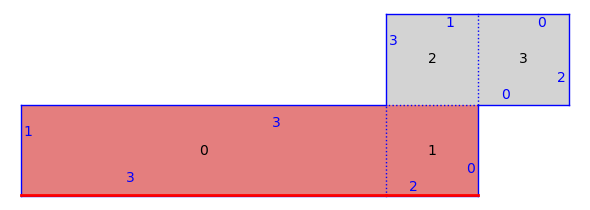

In [217]:
display_info('4,1',1)

In [216]:
DS, S, gs, s = dimple(2,2)
IDC1 = IDC(DS, 2000, veech = 1, show_current_sym = 0)
all_veech_matrices['2,2'] = [list(IDC1.generators(normalize_det=1)),S]


IDR 10/2000 --> 1.25 seconds
Veech terminated


parameters = 2,2

veech_matrices:


[
[ 4  3]  [-3 -1]  [ 0  1]  [-1  0]
[-3 -2], [ 1  0], [-1  0], [ 0 -1]
]


eigenvectors:
0  : (1, -1)
1  : (1, -0.3819660112501051?)
2  : (1, -1*I)
3  : (1, 0)

sample matrix:
[ 4  3]
[-3 -2]

sample eigenvector:
[1, -1]


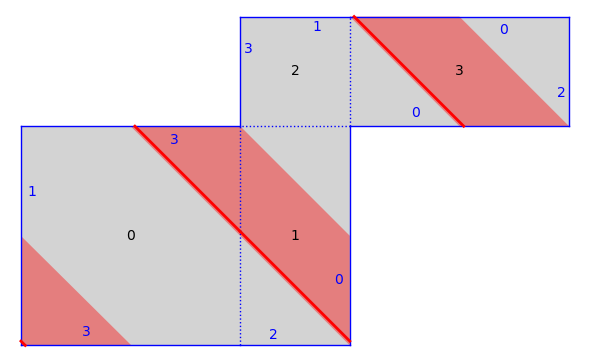

In [326]:
display_info('2,2',0)

In [297]:
DS, S, gs, s = dimple(3,2)
IDC1 = IDC(DS, 2000, veech = 1, show_current_sym = 0)
all_veech_matrices['3,2'] = [list(IDC1.generators(normalize_det=1)),S]


IDR 2000/2000 --> 401.94 seconds


parameters = 3,2

veech_matrices:


[
[-43/3 -92/3]  [-43/3  92/3]  [1 6]  [-49/3 -92/3]  [-1  0]
[ 23/3  49/3], [-23/3  49/3], [0 1], [ 23/3  43/3], [ 0 -1],

[ 43/3 -92/3]
[ 23/3 -49/3]
]


eigenvectors:
0  : (1, -1/2)
1  : (1, 1/2)
2  : (1, 0)
3  : (1, -1/2)
4  : (1, 0)
5  : (1, 1/2)

sample matrix:
[-43/3 -92/3]
[ 23/3  49/3]

sample eigenvector:
[1, -1/2]


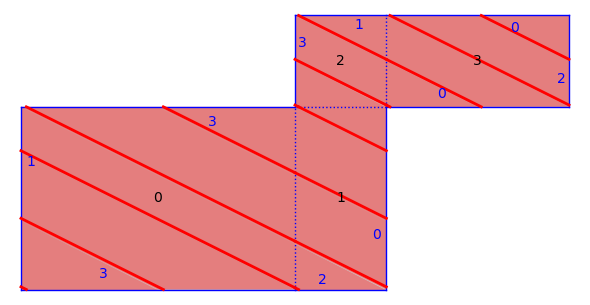

In [327]:
display_info('3,2',0)

In [299]:
DS, S, gs, s = dimple(4,2)
IDC1 = IDC(DS, 3000, veech = 1, show_current_sym = 0)
all_veech_matrices['4,2'] = [list(IDC1.generators(normalize_det=1)),S]

/private/var/tmp/sage-9.6-current/local/var/lib/sage/venv-python3.10.3/lib/python3.10/site-packages/ipykernel/iostream.py:214: RuntimeWarning: cypari2 leaked 381800 bytes on the PARI stack
  self._event_pipe.send(b'')


IDR 3000/3000 --> 674.05 seconds


parameters = 4,2

veech_matrices:


[
[ -65 -121]  [ 67 121]  [ 141  490]  [  34 -175]  [-58 171]  [ 14 -13]
[  36   67], [-36 -65], [ -40 -139], [   7  -36], [-19  56], [ 13 -12],

[ -1 -15]  [ 69 175]  [  56 -171]  [-14 -13]  [1 0]  [ -36 -175]
[  0  -1], [-28 -71], [  19  -58], [ 13  12], [3 1], [   7   34],

[  65 -121]  [-36 175]  [-69 175]  [ -56 -171]  [-1  0]
[  36  -67], [ -7  34], [-28  71], [  19   58], [ 0 -1]
]


eigenvectors:
0  : (1, -6/11)
1  : (1, -6/11)
2  : (1, -2/7)
3  : (1, 1/5)
4  : (1, 1/3)
5  : (1, 1)
6  : (1, 0)
7  : (1, -2/5)
8  : (1, 1/3)
9  : (1, -1)
10 : (0, 1)
11 : (1, -1/5)
12 : (1, 6/11)
13 : (1, 1/5)
14 : (1, 2/5)
15 : (1, -1/3)
16 : (1, 0)

sample matrix:
[ -65 -121]
[  36   67]

sample eigenvector:
[1, -6/11]


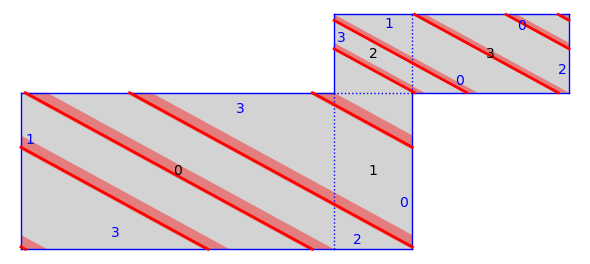

In [328]:
display_info('4,2',0)

In [302]:
DS, S, gs, s = dimple(5,2)
IDC1 = IDC(DS, 2000, veech = 1, show_current_sym = 0)
all_veech_matrices['5,2'] = [list(IDC1.generators(normalize_det=1)),S]


IDR 2000/2000 --> 369.11 seconds


parameters = 5,2

veech_matrices:


[
[1 3]  [-1  0]  [   134     75]  [-1  0]
[0 1], [-9 -1], [1197/5    134], [ 0 -1]
]


eigenvectors:
0  : (1, 0)
1  : (0, 1)
2  : (1, -1.786616914730184?)
3  : (1, 0)

sample matrix:
[1 3]
[0 1]

sample eigenvector:
[1, 0]


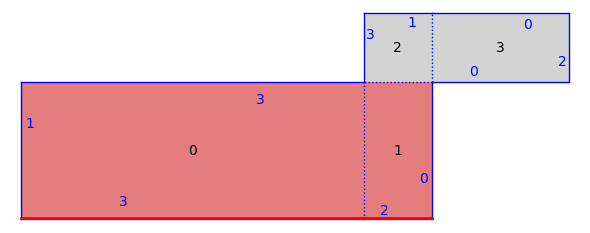

In [329]:
display_info('5,2',0)

In [303]:
DS, S, gs, s = dimple(1,3)
IDC1 = IDC(DS, 3000, veech = 1, show_current_sym = 0)
all_veech_matrices['1,3'] = [list(IDC1.generators(normalize_det=1)),S]


IDR 3000/3000 --> 752.89 seconds


parameters = 1,3

veech_matrices:


[
[  129   120]  [   -79    -72]  [-89  36]  [-1  4]  [ -89  -36]
[416/3   129], [-260/3    -79], [220 -89], [ 0 -1], [-220  -89],

[    47    -36]  [ -1   0]  [ 1  0]  [-1 -4]  [   47    36]
[-184/3     47], [-20  -1], [20  1], [ 0 -1], [184/3    47],

[   -49    -36]  [-1  0]
[-200/3    -49], [ 0 -1]
]


eigenvectors:
0  : (1, -1.074967699773140?)
1  : (1, 1.097134314340639?)
2  : (1, -2.472066162365221?)
3  : (1, 0)
4  : (1, 2.472066162365221?)
5  : (1, 1.305260013830082?)
6  : (0, 1)
7  : (0, 1)
8  : (1, 0)
9  : (1, -1.305260013830082?)
10 : (1, 1.360827634879544?)
11 : (1, 0)

sample matrix:
[ 1  0]
[20  1]

sample eigenvector:
[0, 1]


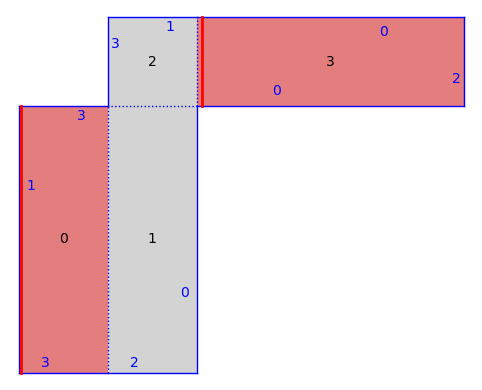

In [330]:
display_info('1,3',7)

In [304]:
DS, S, gs, s = dimple(2,3)
IDC1 = IDC(DS, 3000, veech = 1, show_current_sym = 0)
all_veech_matrices['2,3'] = [list(IDC1.generators(normalize_det=1)),S]


IDR 3000/3000 --> 797.55 seconds


parameters = 2,3

veech_matrices:


[
[-39/2 -41/2]  [-1  4]  [ 43/2  41/2]  [ 1 -4]  [-1  0]  [ 39/2 -41/2]
[ 41/2  43/2], [ 0 -1], [-41/2 -39/2], [ 0  1], [ 0 -1], [ 41/2 -43/2]
]


eigenvectors:
0  : (1, -1)
1  : (1, 0)
2  : (1, -1)
3  : (1, 0)
4  : (1, 0)
5  : (1, 1)

sample matrix:
[-39/2 -41/2]
[ 41/2  43/2]

sample eigenvector:
[1, -1]


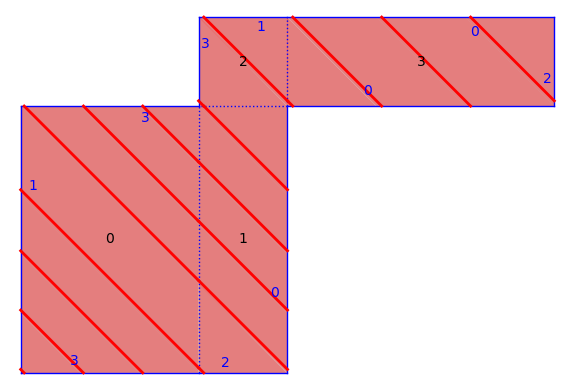

In [331]:
display_info('2,3',0)

In [ ]:
# sage: cyl.holonomy()
# (3*a + 4, 2*a + 3)
# sage: cyl.edges()
# (2, 3, 3, 2, 4)
# cyl.polygons()
# b = cyl.boundary()

In [10]:
DS, S, gs, s = dimple(2,1)

In [ ]:
A = matrix([[1, 6],
            [0, 1]])

In [ ]:
show(DS.plot())
show((A*DS).plot())

In [208]:
show((DS).delaunay_triangulation().plot())
show((A*DS).delaunay_triangulation().plot())

In [ ]:
show(DS.delaunay_decomposition().plot())
show((A*DS).delaunay_decomposition().plot())

In [14]:
show(DS.canonicalize().plot())
show((A*DS).canonicalize().plot())

In [ ]:
print((A*DS).delaunay_triangulation() == DS.delaunay_triangulation())
print((A*DS).delaunay_decomposition() == DS.delaunay_decomposition())
print(DS.canonicalize() == (A*DS).canonicalize())

[
[161 144]  [ 119  180]  [ 121  180]  [ 65 -53]  [ 121 -180]
[180 161], [ -80 -121], [ -80 -119], [-38  31], [  80 -119],

[    47    -77]  [ 23/2  63/2]  [ 473/2   -107]  [-15 -32]  [ 21  11]
[-119/2  195/2], [ -7/2 -19/2], [-305/2     69], [  8  17], [-44 -23],

[ 23  11]  [ -797/4 -1157/4]  [ 29  20]  [ 23 -11]  [-23/2 -63/2]
[-44 -21], [ -549/4  -797/4], [-45 -31], [ 44 -21], [  7/2  19/2],

[-19/2 -63/2]  [-14  -5]  [-161  144]  [65 53]  [  797/4 -1157/4]
[  7/2  23/2], [-39 -14], [ 180 -161], [38 31], [ -549/4   797/4],

[   47    77]  [473/2   107]  [-31 -20]  [-1  6]  [ 479/2 -689/2]
[119/2 195/2], [305/2    69], [ 45  29], [ 0 -1], [-333/2  479/2],

[-15 -58]  [1 0]  [-23 -11]  [   -47     77]  [-121  180]  [-31  20]
[ -8 -31], [6 1], [ 44  21], [ 119/2 -195/2], [ -80  119], [-45  29],

[-1  0]
[ 0 -1]
]

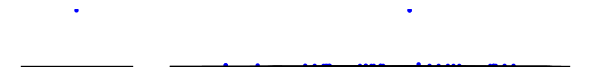

In [222]:
UHP = HyperbolicPlane().UHP()


elements = all_veech_matrices['2,1'][0]


orbit = UHP.get_point(I).show()

for m in elements:
    new_point = moebius_transform(matrix(2,m),I)
    orbit += UHP.get_point(new_point).show()

show(elements)
show(orbit)